In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,accuracy_score,classification_report,confusion_matrix,roc_auc_score,make_scorer
import joblib

#Importing models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.compose import make_column_selector

In [2]:
# here i have imported the cleaned file
df=joblib.load('df_clean.joblib')
df.head()
df.info()
for col in df.columns:
    print(df[col].unique())

<class 'pandas.core.frame.DataFrame'>
Index: 1181 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1181 non-null   object
 1   Age                        1181 non-null   int64 
 2   Gender                     1181 non-null   object
 3   Country                    1181 non-null   object
 4   state                      1181 non-null   object
 5   self_employed              1181 non-null   object
 6   family_history             1181 non-null   object
 7   treatment                  1181 non-null   object
 8   work_interfere             1181 non-null   object
 9   no_employees               1181 non-null   int64 
 10  remote_work                1181 non-null   object
 11  tech_company               1181 non-null   object
 12  benefits                   1181 non-null   object
 13  care_options               1181 non-null   object
 14  wellness_prog

In [4]:
#Input features
X=df.drop(['treatment'],axis=1)

#Target column(Output)
Y=df['treatment']
# Y=Y.map({'Yes':1, 'No':0})
# print(Y.head())

#Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)



In [5]:
df['treatment'].unique()



array(['Yes', 'No'], dtype=object)

Model-1(LOGISTIC REGRESSION)

['No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' '

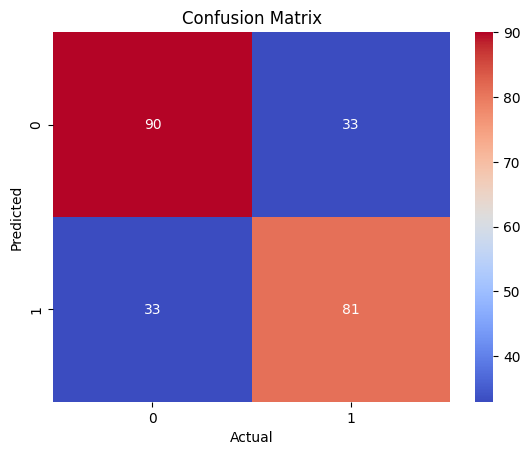

In [6]:
#Building pipeline
def create_prepipe(X):
    num_cols=X.select_dtypes(include='number').columns.tolist()
    cat_cols=X.select_dtypes(include='object').columns.tolist()
    num_pipe = Pipeline([
        ('scaler', StandardScaler())
    ])
    
    cat_pipe = Pipeline([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer([
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])
    
    return preprocessor




pipe1=Pipeline([
    ('preprocessor',create_prepipe(X_train)),
    ('model',LogisticRegression(max_iter=2000,random_state=42))
])
   
#Grid search(for hyperparameter tuning)
param_grid={
    'model__C':[0.01,0.1,1,10],
    'model__solver':['lbfgs','saga'],
    'model__penalty':['l2']
}

gscv1=GridSearchCV(pipe1,param_grid,cv=5)
gscv1.fit(X_train,Y_train)



#Predicting the values using the best model
Y_pred=gscv1.predict(X_test)
print(Y_pred)

#Probability assigned to positive class
Y_prob=gscv1.predict_proba(X_test)[:,1]
print(f"Best parameters:{gscv1.best_params_}")
print("Accuracy score",accuracy_score(Y_test,Y_pred))
print("Classification report:\n",classification_report(Y_test,Y_pred))
print("F1 score:",f1_score(Y_test,Y_pred,average='weighted'))
print("ROC-AUC score:",roc_auc_score(Y_test,Y_prob))
con_mat=confusion_matrix(Y_test,Y_pred)
sns.heatmap(con_mat,annot=True,          
    cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()




In [7]:


# Save model
joblib.dump(gscv1, "logistic_model.joblib")

['logistic_model.joblib']

Model 2(Using Random Forest Classifier)

['No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes'
 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' '

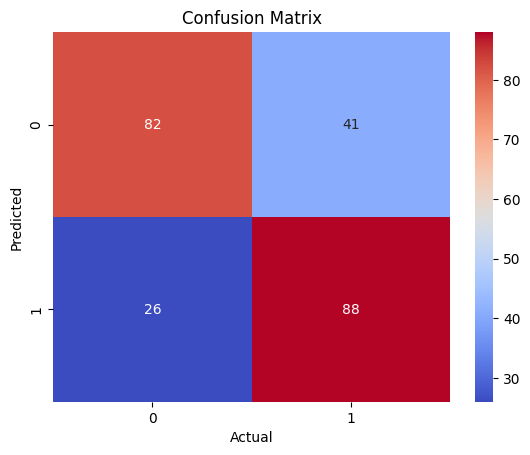

In [25]:
def create_prepipe(X):
    num_cols=X.select_dtypes(include='number').columns.tolist()
    cat_cols=X.select_dtypes(include='object').columns.tolist()
    # num_pipe = Pipeline([
    #     ('scaler', StandardScaler())
    # ])
    
    cat_pipe = Pipeline([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer([
        
        ('cat', cat_pipe, cat_cols)
    ])
    
    return preprocessor

pipe2=Pipeline([
    ('preprocessor',create_prepipe(X_train)),
    ('model',RandomForestClassifier(random_state=42))
])

param_grid2={
    'model__n_estimators':[100,150,200],
    'model__max_depth':[3,10,None],
    'model__min_samples_split':[2,5,7],
    'model__min_samples_leaf':[2,3]

    }

gscv2=GridSearchCV(pipe2,param_grid2,cv=5)
gscv2.fit(X_train,Y_train)
Y_pred2=gscv2.predict(X_test)
print(Y_pred)

#Probability assigned to positive class
Y_prob2=gscv2.predict_proba(X_test)[:,1]
print(f"Best parameters:{gscv2.best_params_}")
print("Accuracy score",accuracy_score(Y_test,Y_pred2))
print("Classification report:\n",classification_report(Y_test,Y_pred2))
print("F1 score:",f1_score(Y_test,Y_pred2,average='weighted'))
print("ROC-AUC score:",roc_auc_score(Y_test,Y_prob2))
con_mat=confusion_matrix(Y_test,Y_pred2)
sns.heatmap(con_mat,annot=True,          
    cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()



Model-3(XG Boost Classifier)

[0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1]
Best parameters:{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.01, 'model__max_depth': 5, 'model__n_estimators': 200, 'model__subsample': 0.8}
Accuracy score 0.7257383966244726
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       123
           1       0.71      0.73      0.72       114

    accuracy                           0.73       237
   macro avg       0.73      0.73      0.73       237
weighted avg       0.73      0.73

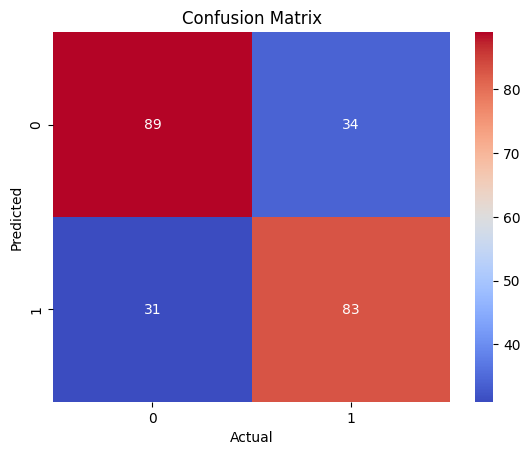

In [26]:

def create_prepipe():
    # num_cols=X.select_dtypes(include='number').columns.tolist()
    # cat_cols=X.select_dtypes(include='object').columns.tolist()
    # num_pipe = Pipeline([
    #     ('scaler', StandardScaler())
    # ])
    
    cat_pipe = Pipeline([
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    
    preprocessor = ColumnTransformer([
        
        ('cat', cat_pipe,  make_column_selector(dtype_include='object'))
    ])
    
    return preprocessor

pipe3=Pipeline([
    ('preprocessor',create_prepipe()),
    ('model',XGBClassifier(random_state=42))
])

param_grid3={
    'model__n_estimators':[100,200],
    'model__max_depth':[3,5,7],
    'model__subsample':[0.8,1.0],
    'model__learning_rate':[0.01,0.1,1],
    'model__colsample_bytree':[0.8,1.0]
    
}

#XGBClassifier expects numeric labels so we map yes and anao to 1 and 0 respectively

Y_train = Y_train.map({'No': 0, 'Yes': 1})
Y_test = Y_test.map({'No': 0, 'Yes': 1})

gscv3=GridSearchCV(pipe3,param_grid3,cv=5)
gscv3.fit(X_train,Y_train)
Y_pred3=gscv3.predict(X_test)
print(Y_pred3)

#Probability assigned to positive class
Y_prob3=gscv3.predict_proba(X_test)[:,1]
print(f"Best parameters:{gscv3.best_params_}")
print("Accuracy score",accuracy_score(Y_test,Y_pred3))
print("Classification report:\n",classification_report(Y_test,Y_pred3))
print("F1 score:",f1_score(Y_test,Y_pred3,average='weighted'))
print("ROC-AUC score:",roc_auc_score(Y_test,Y_prob3))
con_mat=confusion_matrix(Y_test,Y_pred3)
sns.heatmap(con_mat,annot=True,          
    cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()




Model4(SVM)

[0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1]
Best parameters:{'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Accuracy score 0.7257383966244726
Classification report:
               precision    recall  f1-score   support

           0       0.73      0.75      0.74       123
           1       0.72      0.70      0.71       114

    accuracy                           0.73       237
   macro avg       0.73      0.72      0.73       237
weighted avg       0.73      0.73      0.73       237

F1 score: 0.72556216426889
ROC-AUC score: 0.78968763

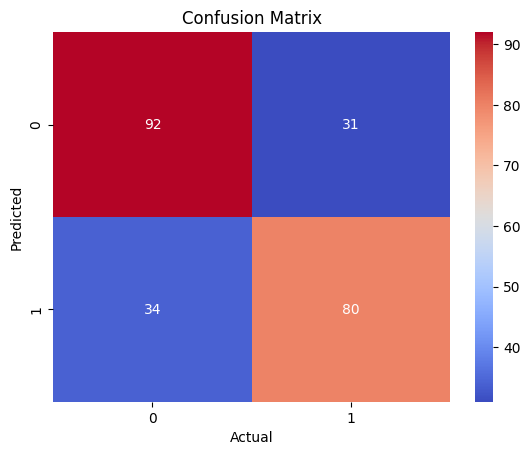

In [28]:
pipe4=Pipeline([
    ('preprocessor',create_prepipe()),
    ('model',SVC(probability=True))
])

param_grid4={
    'model__C':[1,2],
    'model__kernel':['rbf'],
    'model__gamma':['scale'],
    
    
}


gscv4=GridSearchCV(pipe4,param_grid4,cv=5)
gscv4.fit(X_train,Y_train)
Y_pred4=gscv4.predict(X_test)
print(Y_pred4)

#Probability assigned to positive class
Y_prob4=gscv4.predict_proba(X_test)[:,1]
print(f"Best parameters:{gscv4.best_params_}")
print("Accuracy score",accuracy_score(Y_test,Y_pred4))
print("Classification report:\n",classification_report(Y_test,Y_pred4))
print("F1 score:",f1_score(Y_test,Y_pred4,average='weighted'))
print("ROC-AUC score:",roc_auc_score(Y_test,Y_prob4))
con_mat=confusion_matrix(Y_test,Y_pred4)
sns.heatmap(con_mat,annot=True,          
    cmap='coolwarm')
plt.title("Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

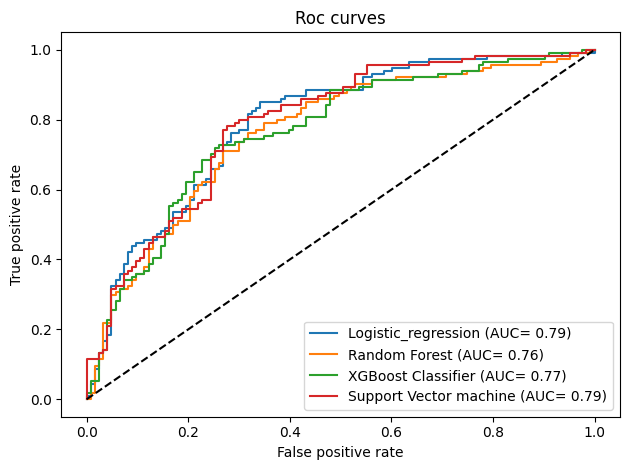

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
models={
    'Logistic_regression':gscv1,
    'Random Forest': gscv2,
    'XGBoost Classifier':gscv3,
    'Support Vector machine':gscv4
}
for name,model in models.items():
    if hasattr(model,"predict_proba"):
        Y_prob=model.predict_proba(X_test)[:,1]
    else:
        decision_scores=model.decision_function(X_test)
        Y_prob=MinMaxScaler().fit_transform(decision_scores.reshape(-1,1)).ravel()

    fpr,tpr,_=roc_curve(Y_test,Y_prob)
    auc=roc_auc_score(Y_test,Y_prob)
    plt.plot(fpr,tpr,label=f"{name} (AUC= {auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("Roc curves")
plt.legend()
plt.tight_layout()
plt.show()

